# Hypothesis Testing in Healthcare: Drug Safety

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |


In [55]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")
drug_safety

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0


## Two-Sample Proportions Z-test

Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups.

In [56]:
adverse_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# successes
yes_drug = adverse_trx[("Drug", "Yes")].sum()
yes_placebo = adverse_trx[("Placebo", "Yes")].sum()

successes = [yes_drug, yes_placebo]

# number of observations
n_drug = adverse_trx.groupby("trx").sum()["Drug"]
n_placebo = adverse_trx.groupby("trx").sum()["Placebo"]

n = [n_drug, n_placebo]

# two-sample proportions z-test
two_sample_results = proportions_ztest(successes, n)
two_sample_p_value = two_sample_results[1]

# result
two_sample_p_value

0.9639333330262475

## Association between Adverse Effects and the Groups

Find out if the number of adverse effects is independent of the treatment and control groups.

In [57]:
# if num_effects is independent of trx
num_effects_groups = pingouin.chi2_independence(data=drug_safety, x='trx', y='num_effects')

num_effects_p_value = num_effects_groups[2]["pval"][0]

# result
num_effects_p_value

0.6150123339426765

## Inspecting Whether Age is Normally Distributed

,W,pval,normal
trx,,,
Drug,0.976785,2.189152e-38,False
Placebo,0.975595,2.224950e-29,False


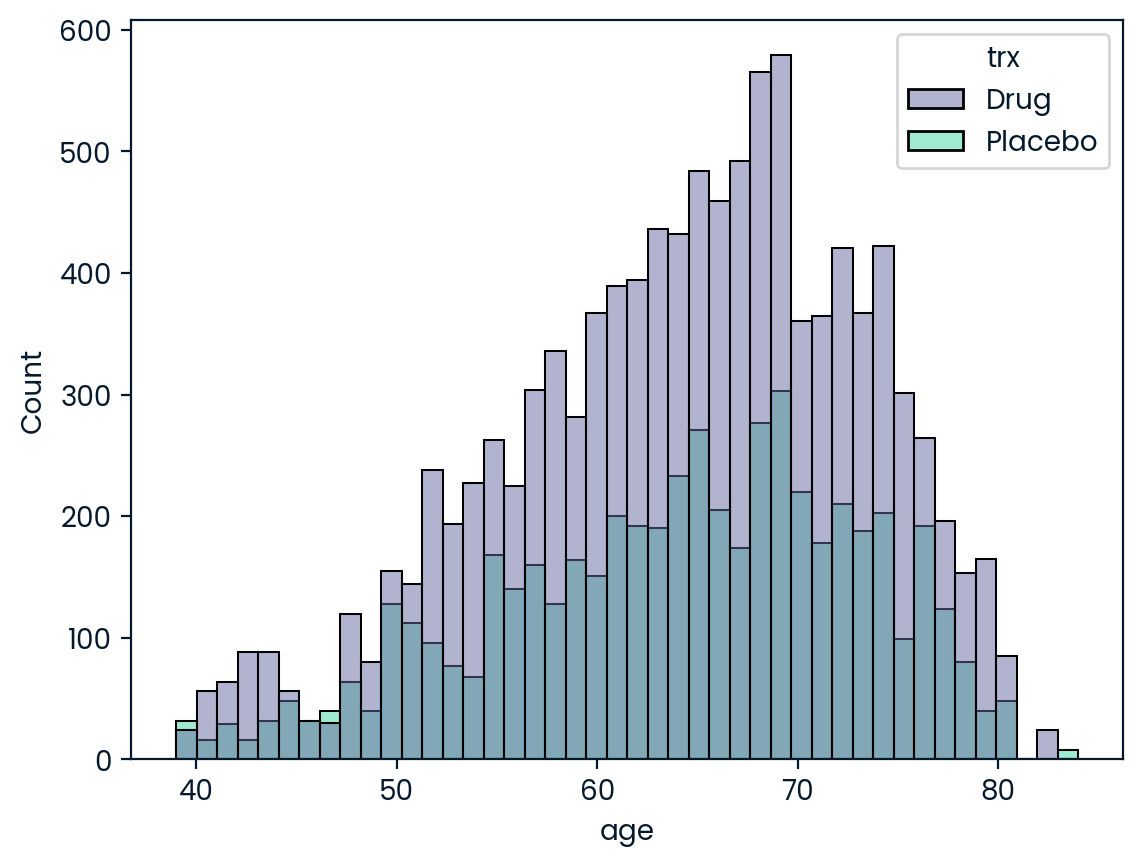

In [58]:
# visualize using histogram
sns.histplot(data=drug_safety, x='age', hue='trx')

# testing for normality
pingouin.normality(data=drug_safety, dv='age', group='trx')

The data distribution is not normal.

## Significant Difference between the Ages of Both Groups

Examine if there is a significant difference between the ages of the Drug and Placebo groups.

In [59]:
# ages of drug and placebo groups
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# perform a Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)

# get the p-value
age_group_effects_p_value = age_group_effects["p-val"]

# result
age_group_effects_p_value

MWU    0.256963
Name: p-val, dtype: float64